In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

box_columns = ['Xmin','Ymin','Xmax','Ymax']

In [4]:
t_d = pd.read_csv('train_data.csv')
t_d['pxs'] = (t_d['Xmax'] - t_d['Xmin'])*(t_d['Ymax'] - t_d['Ymin'])
pxs = t_d.groupby("itemId")['pxs'].mean()
t_d = t_d.merge(pxs, on=["itemId"])
t_d['pxs_ratio'] = t_d['pxs_x'] / t_d['pxs_y']
t_a = pd.read_csv('train_answers.csv')
test_data = pd.read_csv('test_data.csv')

In [6]:
tdd = {}
tad = {}

tpd = {}
tad = {}

bxs = {}
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY
]
itds = set(t_d['itemId'])
abx = np.array(t_d.loc[: 'itemId'][['Xmin','Ymin','Xmax','Ymax']])

In [7]:
obj = 8774
tdd[obj] = t_d[t_d['itemId'] == obj][['Xmin','Ymin','Xmin','Ymax','Xmax','Ymax','Xmax','Ymin','Xmin','Ymin', 'pxs_ratio']]
tad[obj] = t_a[t_a['itemId'] == obj][['Xmin_true','Ymin_true','Xmin_true','Ymax_true','Xmax_true','Ymax_true','Xmax_true','Ymin_true','Xmin_true','Ymin_true']]

In [38]:
obj = 1659
oids = t_d[t_d['userId'] == obj]['itemId']
tdd[obj] = t_d[t_d['userId'] == obj][['Xmin','Ymin','Xmin','Ymax','Xmax','Ymax','Xmax','Ymin','Xmin','Ymin', 'pxs_ratio']]
tad[obj] = t_a[t_a.itemId.isin(oids)][['Xmin_true','Ymin_true','Xmin_true','Ymax_true','Xmax_true','Ymax_true','Xmax_true','Ymin_true','Xmin_true','Ymin_true']]

In [7]:
for i in itds:
    weighted_averaging(t_d, i, abx, quorum)    

ZeroDivisionError: division by zero

(444.0, 1398)

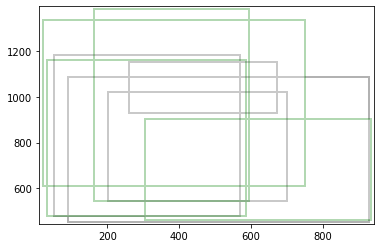

In [39]:
quorum = pd.DataFrame(np.zeros((len(itds), 5), dtype=int), 
                      index=itds, columns=['Xmin','Ymin','Xmax','Ymax', 'itemId'])
# weighted_averaging(t_d, 8774, abx, quorum)

tdv = []
tdc = []
tav = []
tac = []
qc = []
qv = []

Xmin,Ymin = 2000, 2000
Xmax,Ymax = 0, 0

def minMax(row, y):
    global Xmin,Xmax,Ymin,Ymax    
    Xmin = min(Xmin, row.iloc[y])
    Ymin = min(Ymin, row.iloc[y + 1])
    Xmax = max(Xmax, row.iloc[y])
    Ymax = max(Ymax, row.iloc[y + 1])

for i, row in tdd[obj].iterrows():
    for y in range(0,10,2):
        minMax(row, y)
        tdv.append((row.iloc[y], row.iloc[y + 1]))
        tdc.append(codes[y//2])

for i, row in tad[obj].iterrows():
    for y in range(0,10,2):
        minMax(row, y)
        tav.append((row.iloc[y], row.iloc[y + 1]))
        tac.append(codes[y//2])

# tobj = quorum.loc[obj][['Xmin','Ymin','Xmin','Ymax','Xmax','Ymax','Xmax','Ymin','Xmin','Ymin']]
# for y in range(0,10,2):
#     minMax(tobj, y)
#     qv.append((tobj.iloc[y], tobj.iloc[y + 1]))
#     qc.append(codes[y//2])    
    
fig, ax = plt.subplots()
ax.add_patch(patches.PathPatch(Path(tdv, tdc), alpha=.3, facecolor='white', edgecolor='black', lw=2))
ax.add_patch(patches.PathPatch(Path(tav, tac), alpha=.3, facecolor='white', edgecolor='green', lw=2))

# ax.add_patch(patches.PathPatch(Path(qv, qc), facecolor='white', edgecolor='red', lw=2))

ax.set_xlim(Xmin - 10, Xmax + 10)
ax.set_ylim(Ymin - 10, Ymax + 10)    

In [325]:
data = quorum.merge(t_a, on=["itemId"])

In [330]:
data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [331]:
data["iou"].mean()
# вычислять райтинг пошльзоватлей

0.3761529565473004

In [334]:
users = set(t_d['userId'])
test_users = set(test_data['userId'])